In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Exploratory data analysis

In [14]:
train_df = pd.read_csv("data/one_million_mushrooms.csv", delimiter=";")
test_df = pd.read_csv("data/test.csv", delimiter=";")

In [15]:
train_df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,5.68,c,e,w,t,x,c,r,6.73,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,u
1,e,5.62,f,s,n,f,s,c,w,6.10,...,b,i,n,NaN,NaN,f,f,NaN,m,u
2,p,17.29,x,s,n,f,p,NaN,y,6.80,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
3,p,6.16,b,s,n,f,NaN,NaN,w,9.33,...,NaN,s,w,NaN,NaN,t,z,NaN,d,s
4,p,4.46,o,t,n,f,NaN,c,w,0.00,...,f,f,f,NaN,NaN,f,f,n,d,u


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038000 entries, 0 to 1037999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   class                 1038000 non-null  object 
 1   cap-diameter          1038000 non-null  float64
 2   cap-shape             1038000 non-null  object 
 3   cap-surface           798000 non-null   object 
 4   cap-color             1038000 non-null  object 
 5   does-bruise-or-bleed  1038000 non-null  object 
 6   gill-attachment       870000 non-null   object 
 7   gill-spacing          612000 non-null   object 
 8   gill-color            1038000 non-null  object 
 9   stem-height           1038000 non-null  float64
 10  stem-width            1038000 non-null  float64
 11  stem-root             162000 non-null   object 
 12  stem-surface          390000 non-null   object 
 13  stem-color            1038000 non-null  object 
 14  veil-type             54000 non-nu

In [17]:
train_df.isnull().sum()

class                        0
cap-diameter                 0
cap-shape                    0
cap-surface             240000
cap-color                    0
does-bruise-or-bleed         0
gill-attachment         168000
gill-spacing            426000
gill-color                   0
stem-height                  0
stem-width                   0
stem-root               876000
stem-surface            648000
stem-color                   0
veil-type               984000
veil-color              912000
has-ring                     0
ring-type                42000
spore-print-color       930000
habitat                      0
season                       0
dtype: int64

In [18]:
test_df.isnull().sum()

class                        0
cap-diameter                 0
cap-shape                    0
cap-surface             120000
cap-color                    0
does-bruise-or-bleed         0
gill-attachment          84000
gill-spacing            213000
gill-color                   0
stem-height                  0
stem-width                   0
stem-root               438000
stem-surface            324000
stem-color                   0
veil-type               492000
veil-color              456000
has-ring                     0
ring-type                21000
spore-print-color       465000
habitat                      0
season                       0
dtype: int64

In [19]:
test_df.fillna("No value", inplace=True)
train_df.fillna("No value", inplace=True)

In [20]:
# Remove the remaining NaN values
train_df = train_df.dropna()
test_df = test_df.dropna()

In [21]:
numerical_columns = ['cap-diameter','stem-height', 'stem-width']
categorical_columns = ['cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-color',
       'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season']

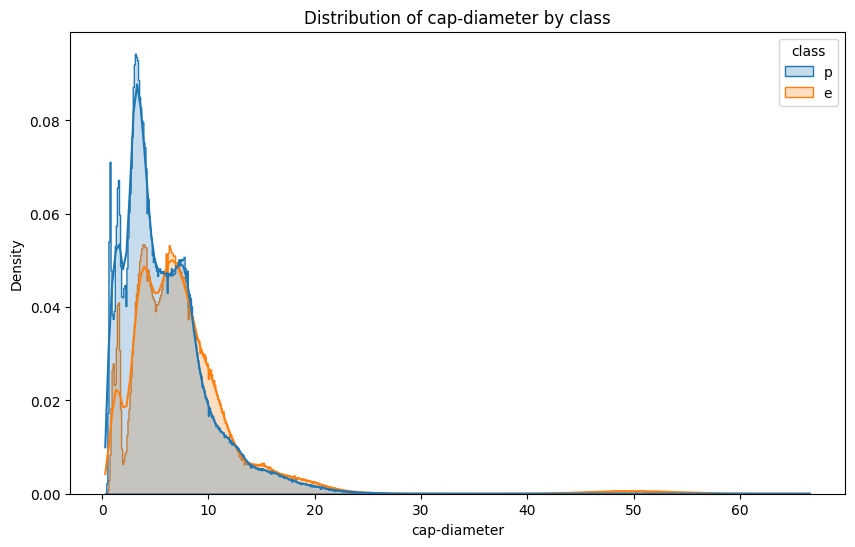

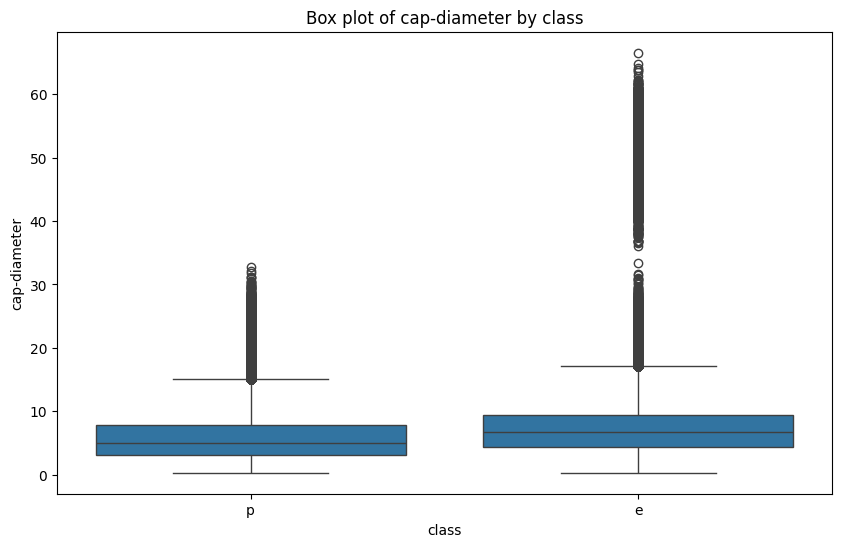

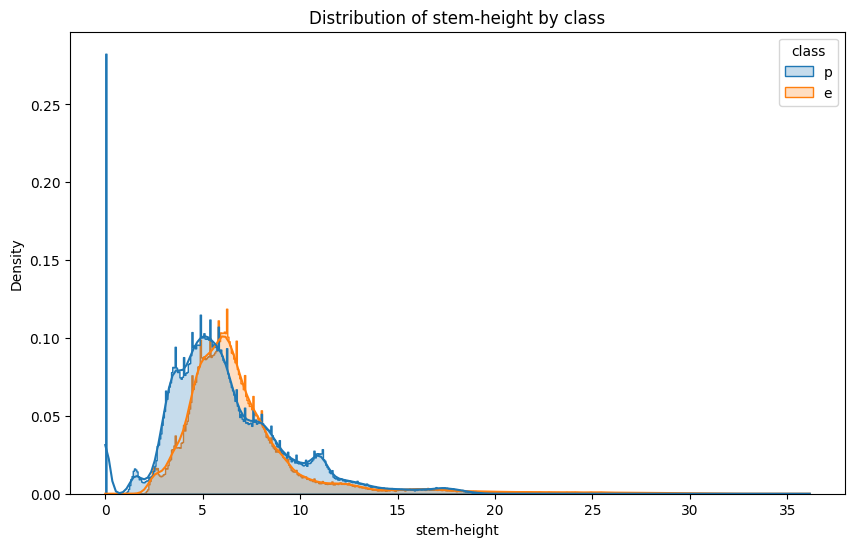

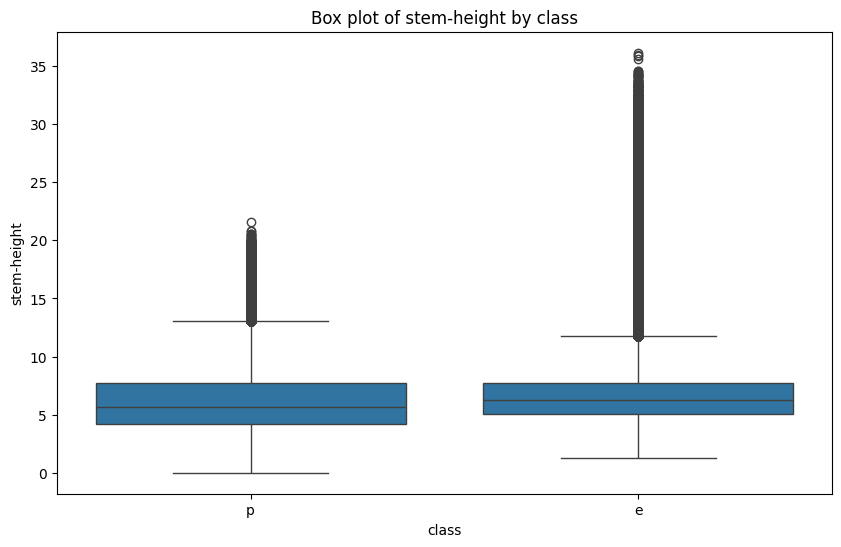

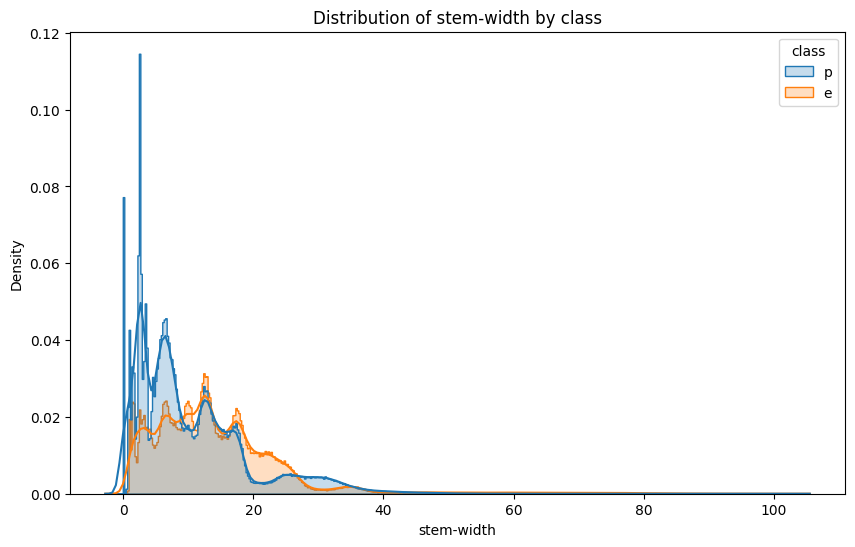

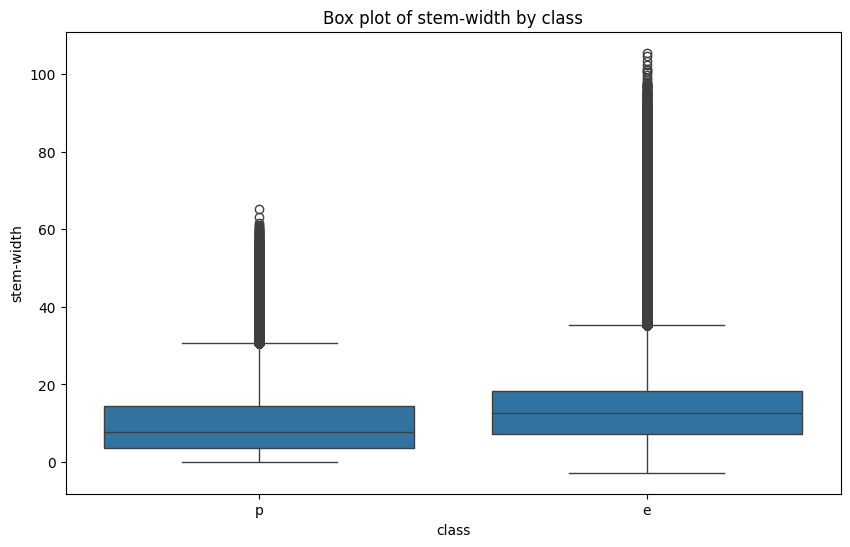

In [22]:
# Plotting numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train_df, x=column, hue='class', kde=True, element='step', stat='density')
    plt.title(f'Distribution of {column} by class')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_df, x='class', y=column)
    plt.title(f'Box plot of {column} by class')
    plt.show()

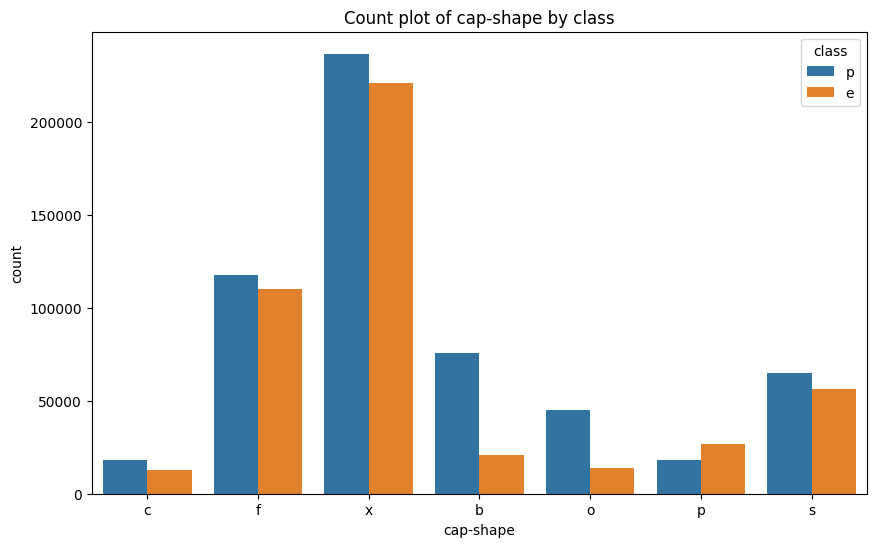

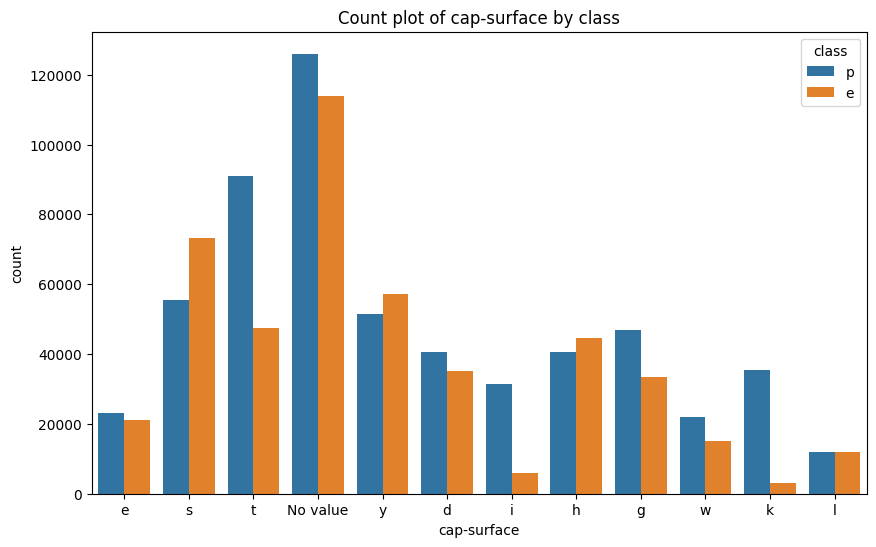

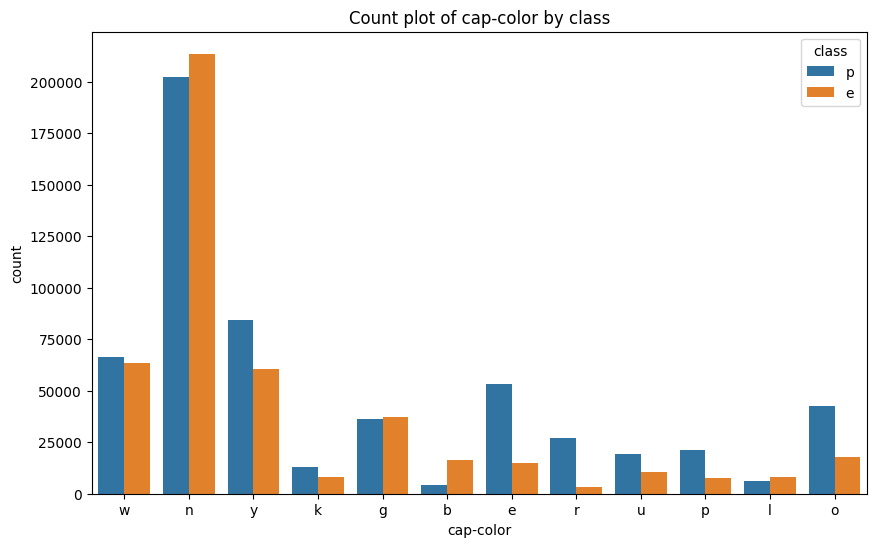

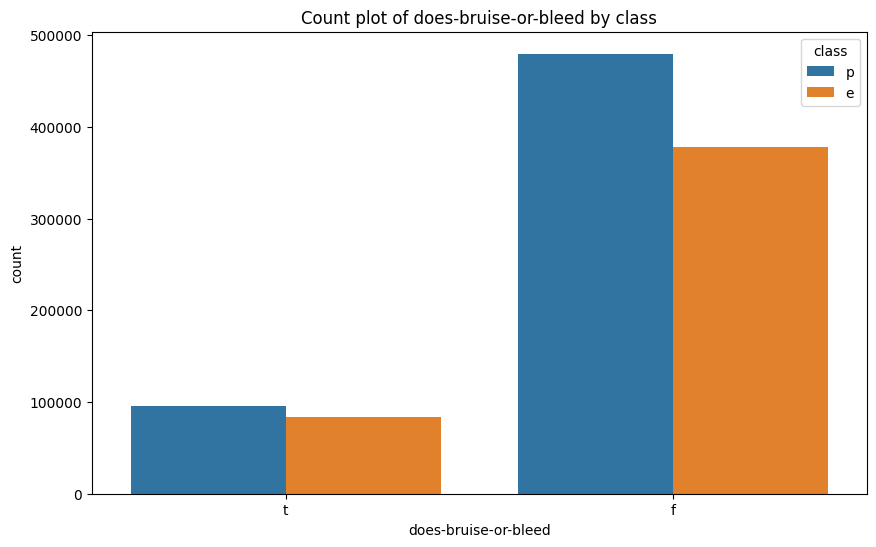

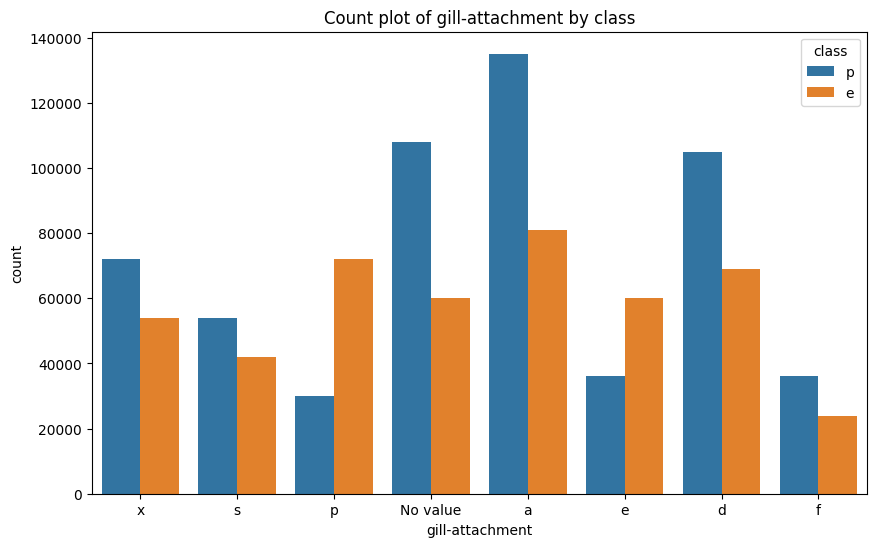

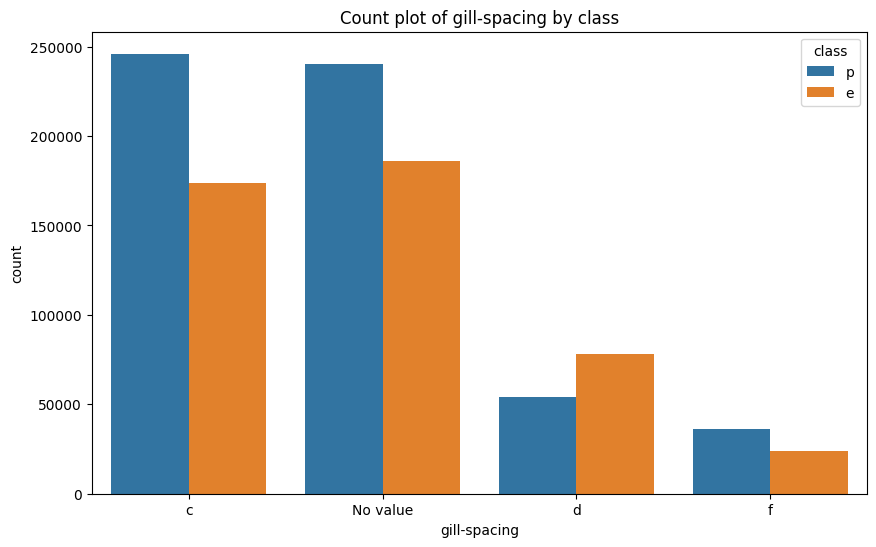

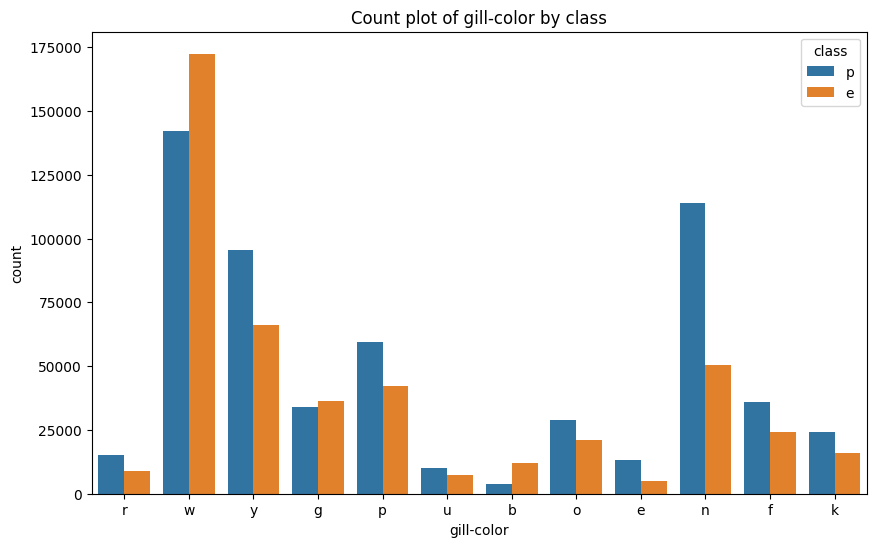

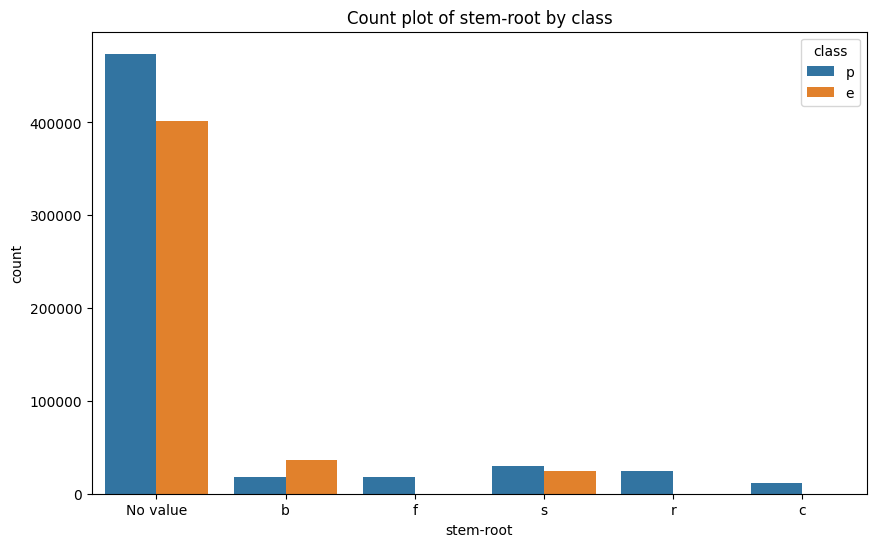

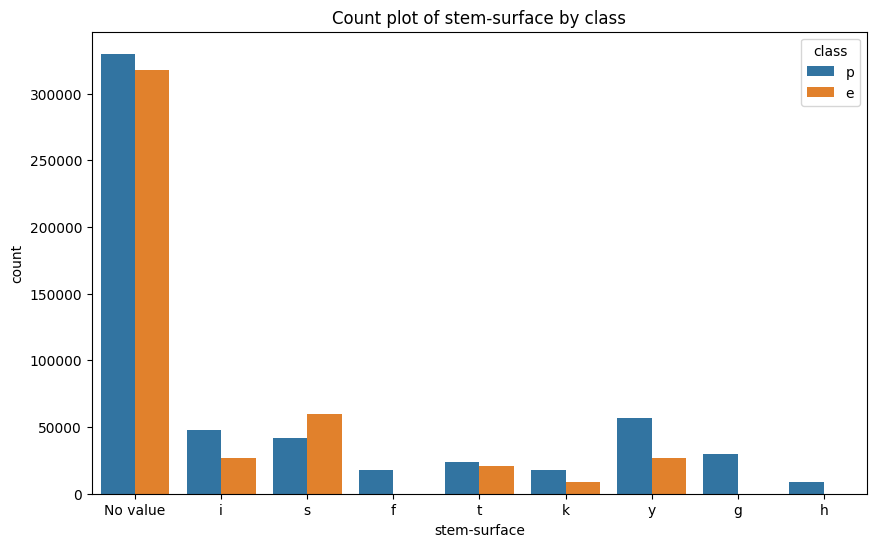

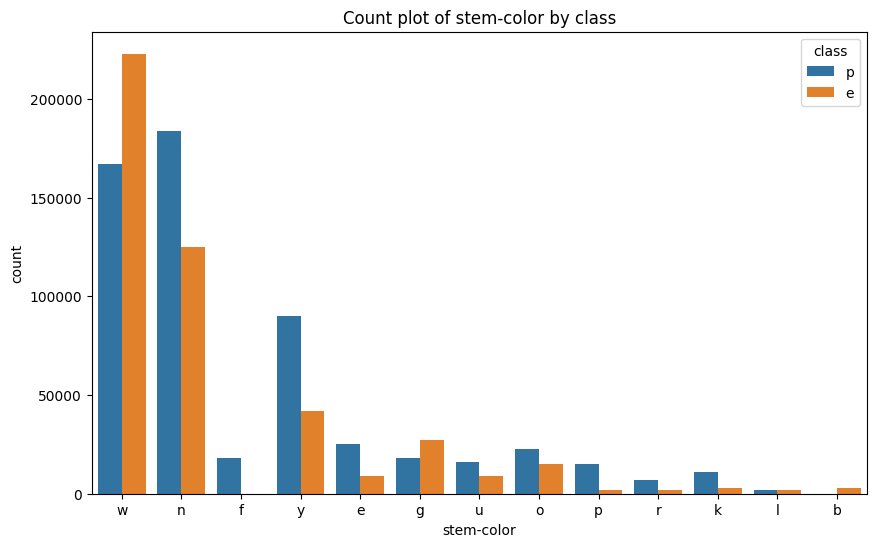

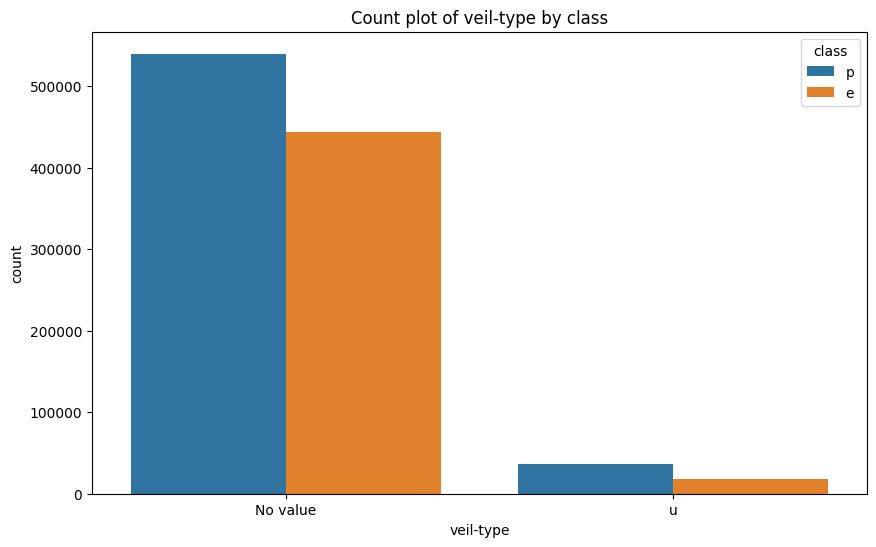

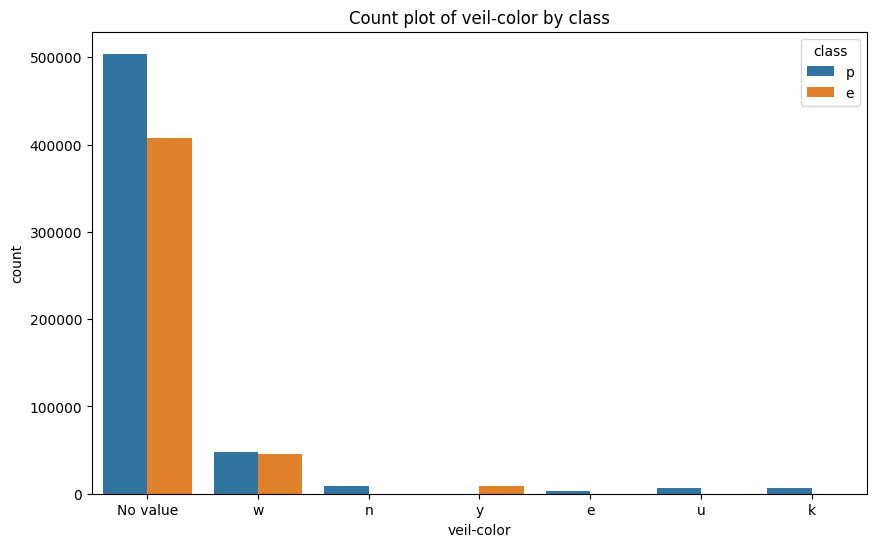

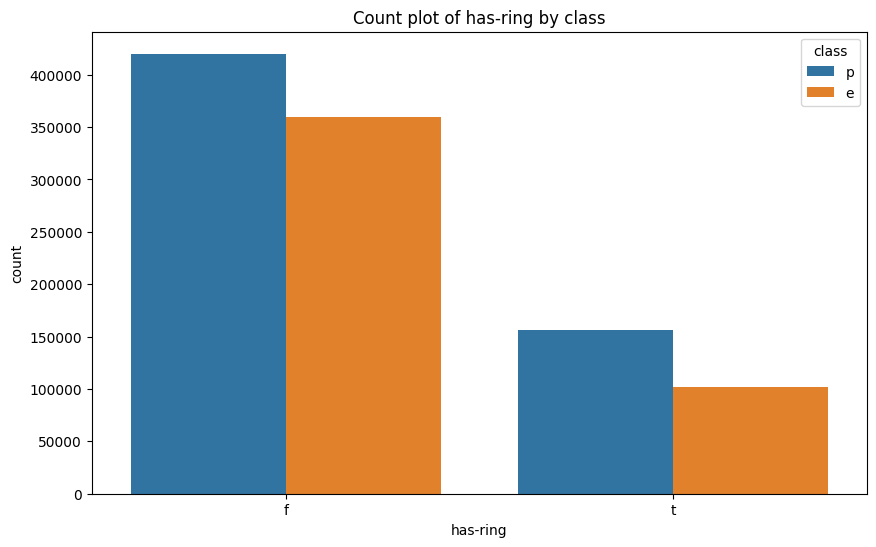

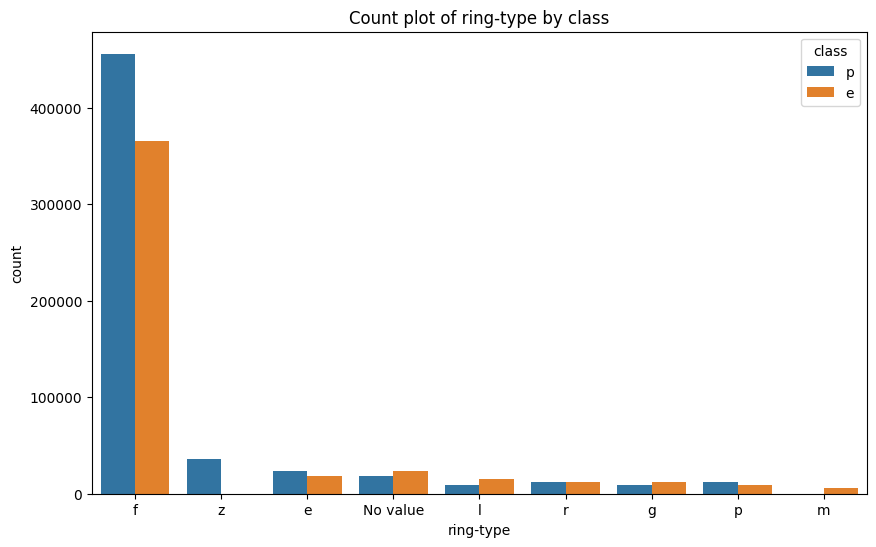

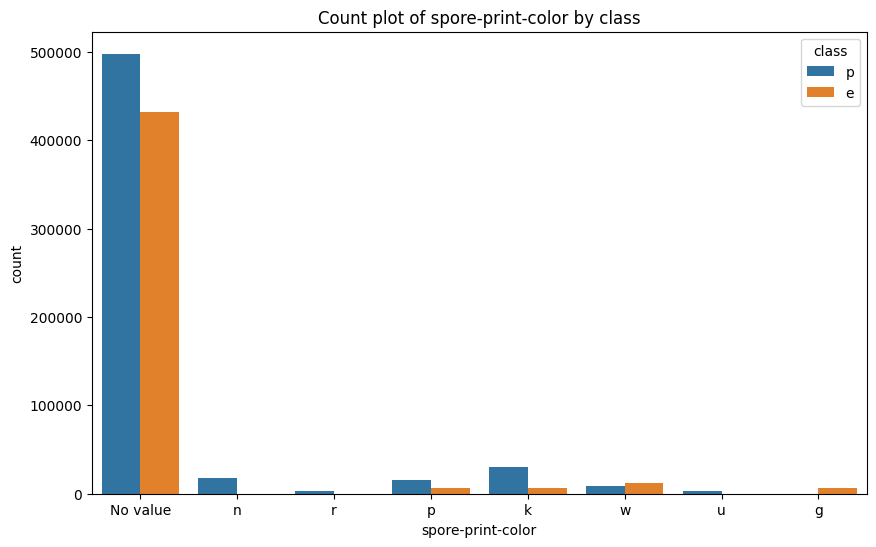

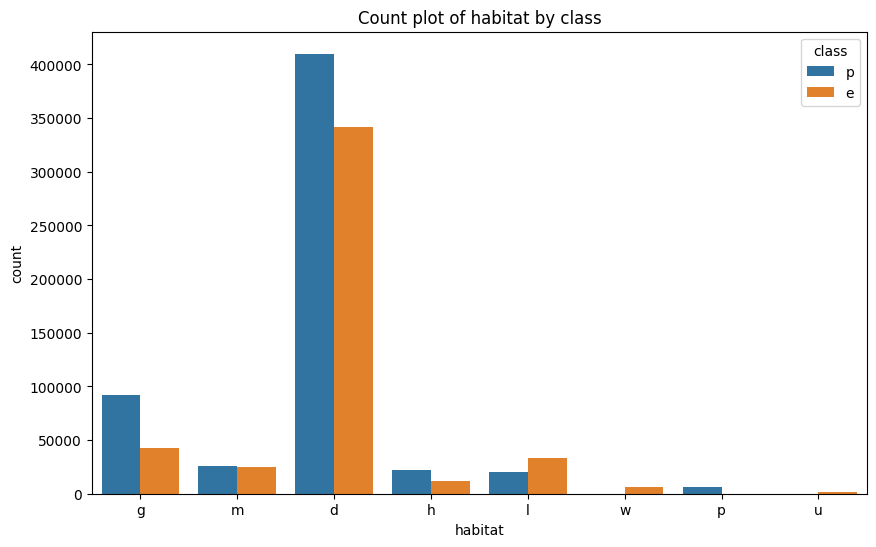

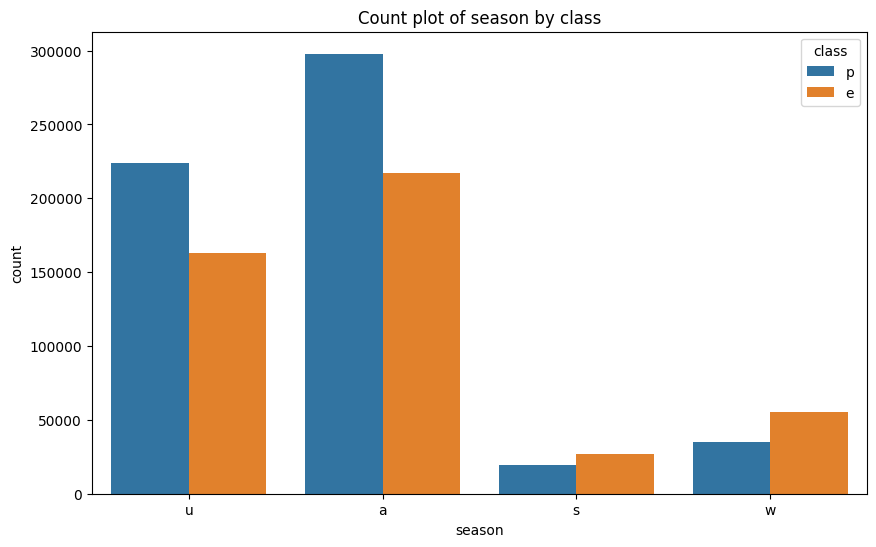

In [23]:
# Plotting categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df, x=column, hue='class')
    plt.title(f'Count plot of {column} by class')
    plt.show()

### Modeling

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

In [25]:
train_df_one_hot = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)
test_df_one_hot = pd.get_dummies(test_df, columns=categorical_columns, drop_first=True)

In [26]:
train_df_one_hot["class"] = train_df_one_hot["class"].map({'p': 0, 'e': 1})
test_df_one_hot["class"] = test_df_one_hot["class"].map({'p': 0, 'e': 1})

In [30]:
scaler = StandardScaler()
train_df_one_hot[numerical_columns] = scaler.fit_transform(train_df_one_hot[numerical_columns])
scaler = StandardScaler()
test_df_one_hot[numerical_columns] = scaler.fit_transform(test_df_one_hot[numerical_columns])

In [31]:
x_train = train_df_one_hot.drop(columns=["class"])
y_train = train_df_one_hot["class"]
x_test = test_df_one_hot.drop(columns=["class"])
y_test = test_df_one_hot["class"]

RandomForestClassifier Accuracy: 1.0


<Axes: >

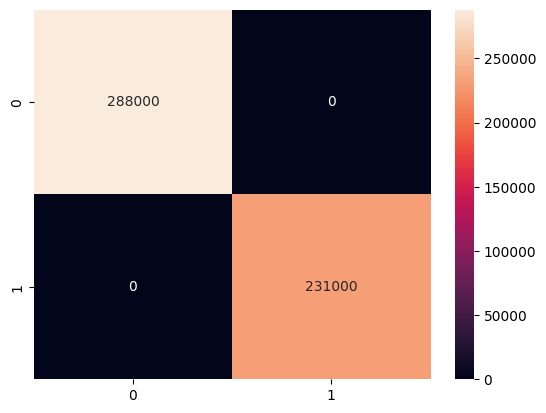

In [38]:
# Train a RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Predict and evaluate RandomForestClassifier
y_pred = model.predict(x_test)
print("RandomForestClassifier Accuracy:", accuracy_score(y_test, y_pred))

#Plot confusion matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d')

Logistic Regression Accuracy: 0.8665568400770713


<Axes: >

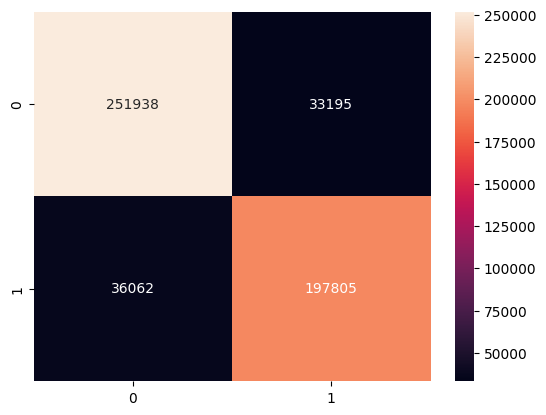

In [41]:
# Train a LogisticRegression model
logreg = LogisticRegression(max_iter=200)
logreg.fit(x_train, y_train)

# Predict and evaluate LogisticRegression
y_pred = logreg.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

#Plot confusion matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d')

XGBoost Accuracy: 0.9999306358381503


<Axes: >

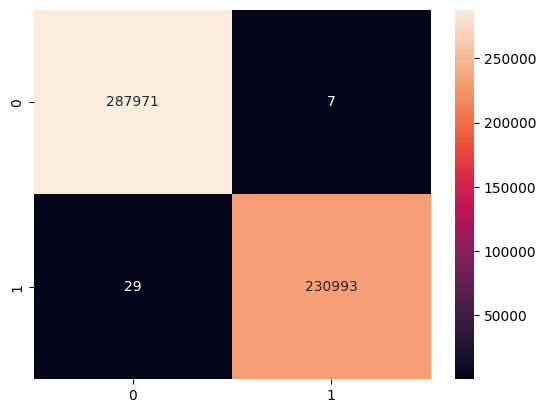

In [37]:
# Train an XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

# Predict and evaluate XGBoost
y_pred = xgb_model.predict(x_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))

#Plot confusion matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d')